Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


Step 2: Load & Clean the Data

In [3]:
# Load the dataset
df = pd.read_csv("heart_attack_prediction_dataset.csv")

# Drop unnecessary columns
columns_to_drop = ["Patient ID", "Country", "Continent", "Hemisphere", "Sex", "Diet", "Income"]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Split Blood Pressure into Systolic and Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df = df.drop(columns=['Blood Pressure'])

# Display first few rows
df.head()


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,31.251233,286,0,6,0,158.0,88.0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,27.194973,235,1,7,0,165.0,93.0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,28.176571,587,4,4,0,174.0,99.0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,36.464704,378,3,4,0,163.0,100.0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,21.809144,231,1,5,0,91.0,88.0


Step 2.1: Data Visualization (Correlation Heatmap & Histograms)

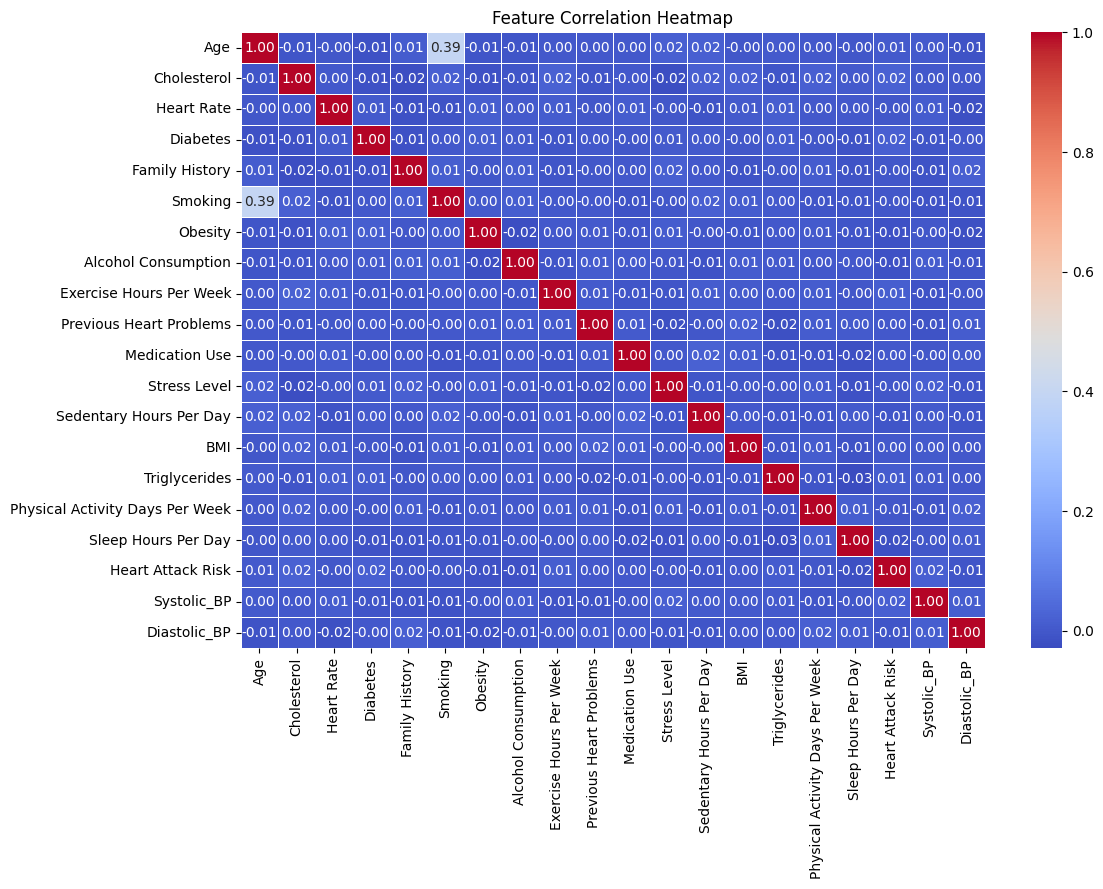

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better visualization
plt.figure(figsize=(12, 8))

# Compute correlation matrix
corr_matrix = df.corr()

# Heatmap to visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Step 2.2: Histograms to Show Distribution of Variables

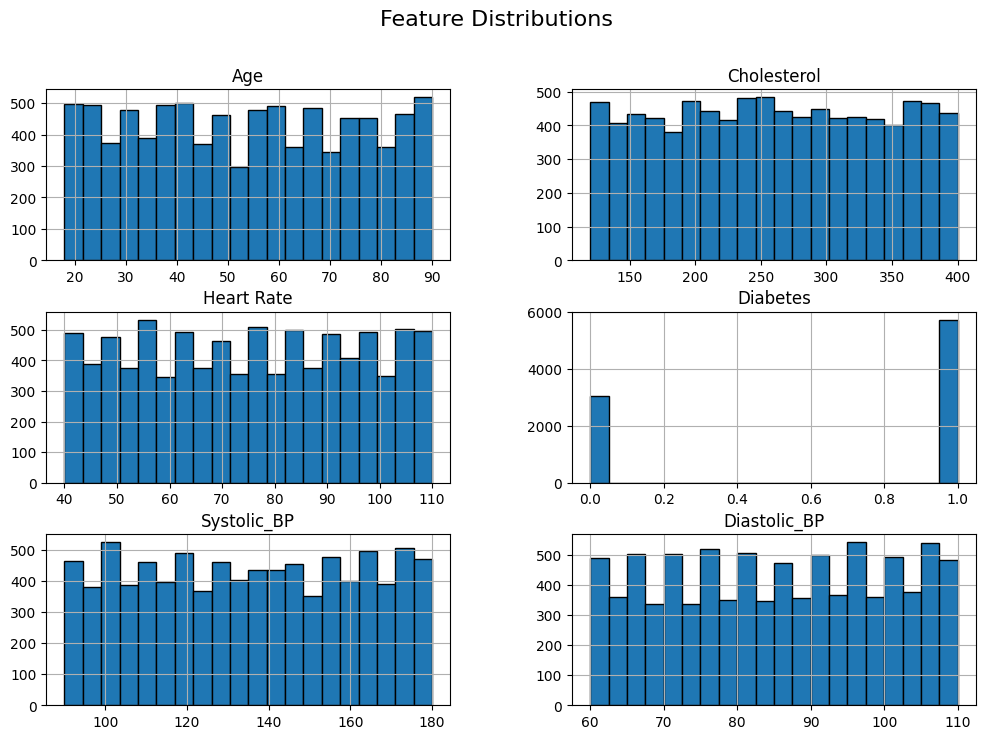

In [5]:
# Plot histograms for selected features
df[["Age", "Cholesterol", "Heart Rate", "Diabetes", "Systolic_BP", "Diastolic_BP"]].hist(figsize=(12, 8), bins=20, edgecolor='black')

# Show the plots
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Step 3: Data Preprocessing

In [14]:
# Define features (X) and target (y)
X = df[["Age", "Cholesterol", "Heart Rate", "Diabetes", "Systolic_BP", "Diastolic_BP"]]
y = df["Heart Attack Risk"]

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [16]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, 6)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 6)


X_train shape: (7010, 6)
X_test shape: (1753, 6)


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Ensure X_train_scaled has 6 features


LinearRegression()

Step 4: Train the Linear Regression Model

In [7]:
# Train Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R² Score:", r2_linear)


Linear Regression MSE: 0.22975217823322722
Linear Regression R² Score: 0.0006645272748604381


Step 5: Train Decision Tree Model

In [8]:
# Train Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree MSE:", mse_tree)
print("Decision Tree R² Score:", r2_tree)


Decision Tree MSE: 0.4535082715345123
Decision Tree R² Score: -0.9725902335456467


Step 6: Train Random Forest Model

In [9]:
# Train Random Forest Model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_forest = forest_model.predict(X_test_scaled)

# Evaluate Random Forest
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest MSE:", mse_forest)
print("Random Forest R² Score:", r2_forest)


Random Forest MSE: 0.24404803194523672
Random Forest R² Score: -0.061517053927812704


Step 7: Select and Save the Best Model

In [10]:
# Find the best model based on MSE
best_model = min(
    (mse_linear, "Linear Regression", linear_reg),
    (mse_tree, "Decision Tree", tree_model),
    (mse_forest, "Random Forest", forest_model),
    key=lambda x: x[0]
)

print(f"Best model: {best_model[1]} with MSE: {best_model[0]}")

# Save the best model
joblib.dump(best_model[2], "best_heart_attack_model.pkl")
print("Model saved successfully!")


Best model: Linear Regression with MSE: 0.22975217823322722
Model saved successfully!


Step 8: Make Prediction on One Test Row


In [11]:
# Select a single test row
sample = X_test_scaled[0].reshape(1, -1)

# Load the best model
best_model_loaded = joblib.load("best_heart_attack_model.pkl")

# Predict on a single test row
prediction = best_model_loaded.predict(sample)
print("Heart Attack Risk Prediction:", prediction)


Heart Attack Risk Prediction: [0.35858862]


Step 9: Scatter Plot for Linear Regression

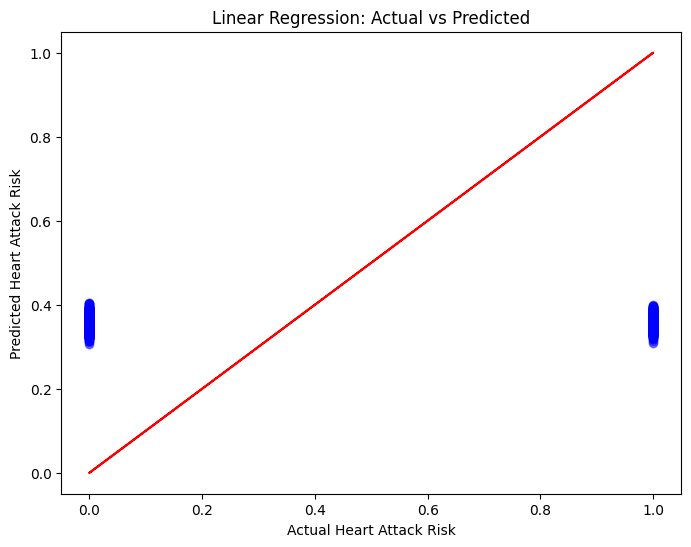

In [12]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, color="blue", alpha=0.5)
plt.plot(y_test, y_test, color="red")  # Perfect fit line
plt.xlabel("Actual Heart Attack Risk")
plt.ylabel("Predicted Heart Attack Risk")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [17]:
import joblib

# Load the saved model
model = joblib.load("best_heart_attack_model.pkl")

# Check the number of features the model was trained on
print("Model expects this number of features:", model.n_features_in_)

# If you want to see the feature coefficients
print("Feature coefficients:", model.coef_)


Model expects this number of features: 6
Feature coefficients: [ 0.00462401  0.01088904 -0.00223112  0.0081591   0.00859893 -0.00165126]
